In [1]:
from birdy import WPSClient
import birdy 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)

finch_server = 'http://localhost:8092/wps'   # finch 

finch_i = WPSClient(url=finch_server, progress=True)
finch = WPSClient(finch_server)

In [5]:
# pf? for general exploration on processes provided by flyingpigeon
help(fp.subset_countries) # or type: fp.subset_countries?

Help on method subset_countries in module birdy.client.base:

subset_countries(resource=None, region='DEU', mosaic=True) method of birdy.client.base.WPSClient instance
    Return the data whose grid cells intersect the selected countries for each input dataset.
    
    Parameters
    ----------
    region : {'ABW', 'AFG', 'AGO', 'ALB', 'ALD', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', ...}//www.w3.org/TR/xmlschema-2/#string
        Country code, see ISO-3166-3:                          https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Officially_assigned_code_elements
    mosaic : //www.w3.org/TR/xmlschema-2/#boolean
        If True, selected regions will be merged into a single geometry.
    resource : ComplexData:mimetype:`application/x-netcdf`, :mimetype:`application/x-tar`, :mimetype:`application/zip`
        NetCDF Files or archive (tar/zip) containing NetCDF files.
    
    Returns
    -------
    output : ComplexData:mimetype:`application/x-tar`
        Tar archive of the subsetted netC

In [3]:

# This is a local installation of birdhouse including the SErvices of country subsetting provided by flyingpigeon. 
# climate model data of the CORDEX AFR-22 domain had been downloaded an placed (with a symbolic link) into the local 
# folder '/tmp/data/AFR-22/tas' which is the default data storage of birdhouse. From here the data can be fetched
# via 'http://' url:

from os import path, listdir
from eggshell.nc import nc_utils

path = '/tmp/data/AFR-22/pr/'
url = 'http://localhost:8093/outputs/data/AFR-22/pr/'

# lists all files stored in 'path'
files = listdir(path)       

# sort files and find the existing datasets
datasets = nc_utils.sort_by_filename([path+f for f in files]) 
# print(datasets.keys())

# creating the urls for each rcp26 file and print out the first 5 as examples
names = [n for n in datasets.keys()]
print(names)


['pr_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_GERICS-REMO2015_v1_day_20060101-20991230', 'pr_AFR-22_MPI-M-MPI-ESM-LR_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-21001231', 'pr_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19790101-20161231', 'pr_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_day_19790102-20171231', 'pr_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20051230', 'pr_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-20051230', 'pr_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-20981230', 'pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-20991230', 'pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20060101-20701230', 'pr_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20051231', 'pr_AFR-22_NCC-NorESM1-M_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20051231']


In [ ]:
# running flyingpigon polygonsubset file by file 
out_all = []
for n in range(len(names)):
    resource = [url+f for f in files if names[n][:-20] in f]
    for i in range(len(resource)):
        
        out = fp_i.subset_countries(resource=resource[i], region='NER')
        print(out.get()[1])
        out_all.allocate(out.get()[1])

print(out_all)

http://127.0.0.1:8093/outputs/ede764cc-3ea6-11ea-a34f-9cb6d08a53e7/pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20060101-20101230_NER.nc
http://127.0.0.1:8093/outputs/fb00f1dc-3ea6-11ea-85c2-9cb6d08a53e7/pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20110101-20151230_NER.nc
http://127.0.0.1:8093/outputs/07fef866-3ea7-11ea-8662-9cb6d08a53e7/pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20160101-20201230_NER.nc
http://127.0.0.1:8093/outputs/194c8426-3ea7-11ea-b7f6-9cb6d08a53e7/pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20210101-20251230_NER.nc
http://127.0.0.1:8093/outputs/28806f84-3ea7-11ea-9f80-9cb6d08a53e7/pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20260101-20301230_NER.nc
http://127.0.0.1:8093/outputs/38c4ab8a-3ea7-11ea-a7ac-9cb6d08a53e7/pr_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20310101-20351230_NER.nc
http://127.0.0.1:8093/outputs/47d2558c-3ea7-11ea-8adf-9cb6d08a53e7/pr_AFR-22

ReadTimeout: HTTPConnectionPool(host='localhost', port=8093): Read timed out. (read timeout=30)

In [ ]:
# similar example with finchs bbox subset:

lon0 = 0 # Minimum longitude.
lon1 = 17.0 # Maximum longitude.
lat0 = 10.5 # Minimum latitude.
lat1 = 24.0 # Maximum latitude.

out_tas = finch_i.subset_bbox(
    resource=resource, lon0=lon0, lon1=lon1, lat0=lat0, lat1=lat1)

In [8]:
## manual download to local file system ... (to be changed)

from os import path, listdir

path = '/home/nils/nap_niger/data/NER/'
# lists all files stored in 'path'
files = [ path+f for f in listdir(path) if 'tas_' in f]
files[:5]   # show the first files 

['/home/nils/nap_niger/data/NER/tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20410101-20451230_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20160101-20201230_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20110101-20151230_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20760101-20801230_NER.nc',
 '/home/nils/nap_niger/data/NER/tas_AFR-22_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19860101-19901231_NER.nc']

In [30]:
def plot_file(resource): 
    from netCDF4 import Dataset, num2date
    from eggshell.nc.nc_utils import get_variable

    var = get_variable(resource)
    #print 'variable name: %s' % var
    ds = Dataset(resource)
    var = ds.variables[var]
    lat = ds.variables['lat']
    lon = ds.variables['lon']

    from matplotlib import pyplot as plt
    from cartopy import config
    from cartopy.util import add_cyclic_point
    import cartopy.crs as ccrs
    from numpy import meshgrid
    # to show the plots inline
    %matplotlib inline

    lons, lats = meshgrid(lon, lat)


    cs = plt.contourf(lons, lats, var[0,:,:])
    # plot first time stepp:
    ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
    ax.coastlines()
    ax.gridlines()
    cs = plt.contourf(lons, lats, var[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
    #plt.colorbar()

#plt.clabel(cs, inline=1, fontsize=10)

In [28]:
%matplotlib inline

from netCDF4 import Dataset, num2date
from eggshell.nc.nc_utils import get_variable
from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from numpy import meshgrid
# to show the plots inline
%matplotlib inline

In [26]:
var = get_variable(outexample)
#print 'variable name: %s' % var
ds = Dataset(outexample)
var = ds.variables[var]
lat = ds.variables['rlat']
lon = ds.variables['rlon']

lons, lats = meshgrid(lon, lat)

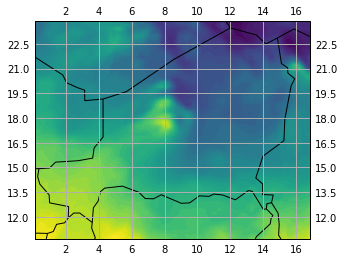

In [38]:
cs = plt.contourf(lons, lats, var[0,:,:])
# plot first time stepp:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

ax.add_feature(cfeature.BORDERS)
#     ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

cs = plt.contourf(lons, lats, var[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='none')

In [87]:
# perform a polygon subset with flyingpigeon

# manual merge of all bbox pieces with cdo into one file covering all timestepps 

resource = '/home/nils/nap_niger/data/tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-2991230.nc'
out_tas = fp.subset_countries(resource=resource, region='NER')

In [94]:
out_tas.get()

subset_countriesResponse(
    output='http://127.0.0.1:8093/outputs/21068c2c-3e14-11ea-a831-9cb6d08a53e7/tmpk6jjtv62.tar',
    ncout='http://127.0.0.1:8093/outputs/21068c2c-3e14-11ea-a831-9cb6d08a53e7/tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-2991230_NER.nc'
)

In [98]:
# manually download file to local filesystem

NER_subset = '/home/nils/nap_niger/data/NER/tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-2991230_NER.nc'

var = get_variable(NER_subset)
#print 'variable name: %s' % var
ds = Dataset(NER_subset)
var = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

lons, lats = meshgrid(lon, lat)

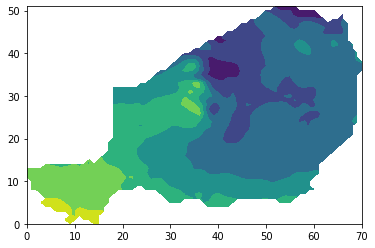

In [105]:
# cs = plt.contourf(lons, lats, var[0,:,:])
# # plot first time stepp:
# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()
# ax.gridlines()

# ax.add_feature(cfeature.BORDERS)
# #     ax.add_feature(cfeature.RIVERS)
# ax.gridlines(draw_labels=True)

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')

# cs = plt.contourf(lons, lats, var[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='none')
cs = plt.contourf(var[0,:,:])

In [104]:
var[0,:,:].shape

(52, 71)